In [4]:
# Created: 20250104

In [5]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [6]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


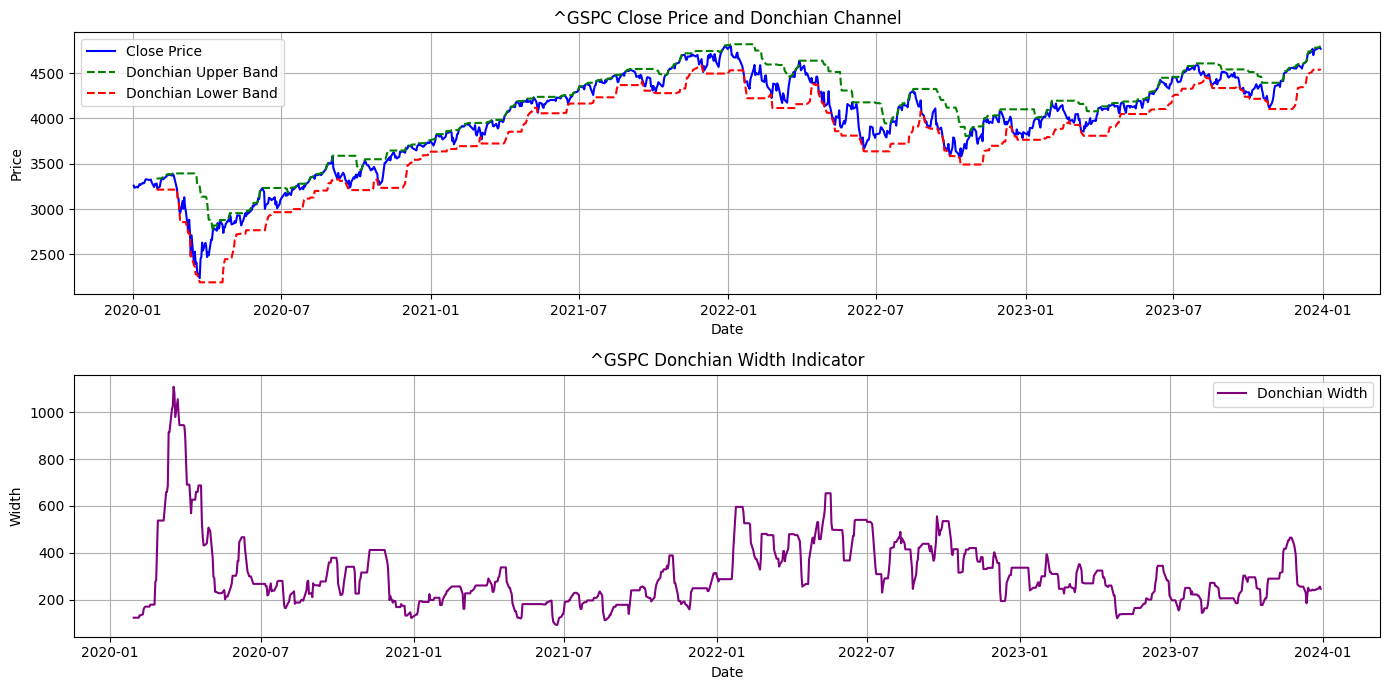

In [8]:
# Step 2: Calculate Donchian Width Indicator
def calculate_donchian_width(data, period=20):
    data['Donchian Upper Band'] = data['High'].rolling(window=period).max()
    data['Donchian Lower Band'] = data['Low'].rolling(window=period).min()
    data['Donchian Width'] = data['Donchian Upper Band'] - data['Donchian Lower Band']
    return data

In [9]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply Donchian Width calculation
    data = calculate_donchian_width(data)
    
    # Step 3: Plot Close Price and Donchian Width
    plt.figure(figsize=(14, 7))
    
    # Plot Close Price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['Donchian Upper Band'], label='Donchian Upper Band', color='green', linestyle='--')
    plt.plot(data['Donchian Lower Band'], label='Donchian Lower Band', color='red', linestyle='--')
    plt.title(f'{symbol} Close Price and Donchian Channel')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Plot Donchian Width
    plt.subplot(2, 1, 2)
    plt.plot(data['Donchian Width'], label='Donchian Width', color='purple', linewidth=1.5)
    plt.title(f'{symbol} Donchian Width Indicator')
    plt.xlabel('Date')
    plt.ylabel('Width')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


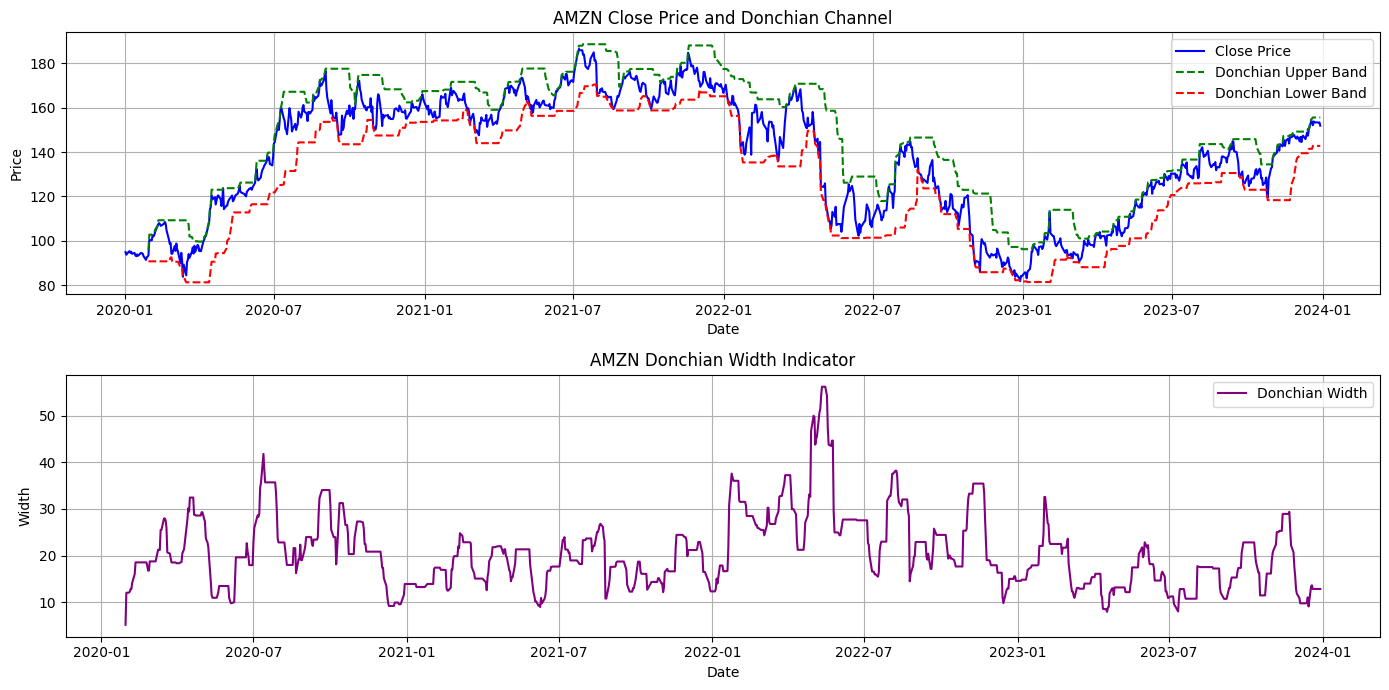

In [10]:
show_graph("AMZN")